### PYTHON IN INVESTMENT AND CONSUMER BANKING: PREDICTIVE MODELS AND RISK EVALUATIONS (PART1)

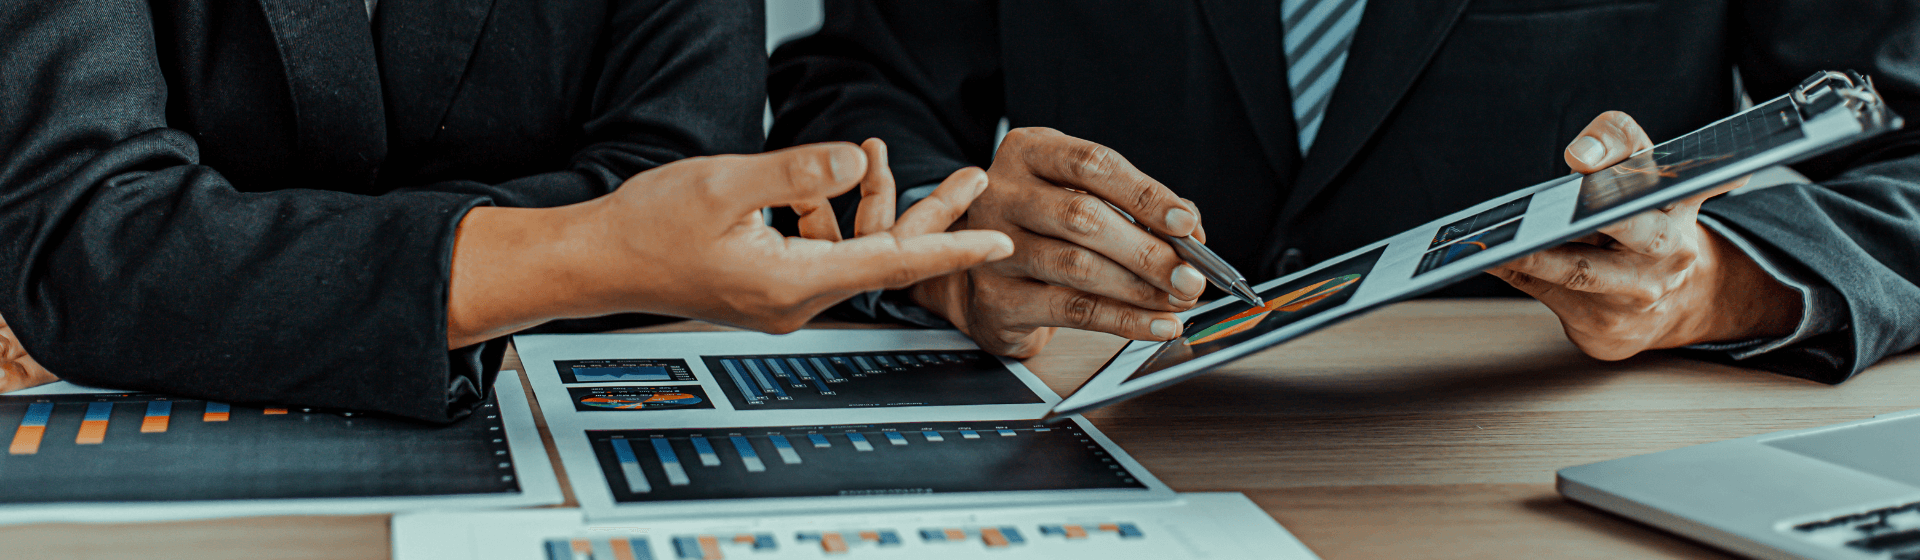

### <font color="royalblue">Hemant Thapa

### IMPORT LIBRARIES

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import yfinance as yf

#### 1. Data mining from yfinance Api

In [201]:
#Coca cola 10 year chart
coca_cola = yf.download('CCH.L', period='10y')

[*********************100%***********************]  1 of 1 completed


#### 2. Price Chart

In [202]:
coca_cola

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-04-29,1750.0,1750.0,1685.0,1750.0,1288.258545,479602
2013-04-30,1775.0,1829.0,1550.0,1690.0,1244.089600,1755272
2013-05-01,1724.0,1724.0,1602.0,1630.0,1199.920898,377226
2013-05-02,1557.0,1632.0,1557.0,1615.0,1188.878540,1296597
2013-05-03,1630.0,1630.0,1600.0,1610.0,1185.197754,341846
...,...,...,...,...,...,...
2023-03-08,2149.0,2188.0,2149.0,2179.0,2179.000000,673939
2023-03-09,2162.0,2194.0,2162.0,2175.0,2175.000000,532855
2023-03-10,2168.0,2176.0,2129.0,2146.0,2146.000000,540296


#### 3. Attributes of Data Frame

In [203]:
coca_cola.index

DatetimeIndex(['2013-04-29', '2013-04-30', '2013-05-01', '2013-05-02',
               '2013-05-03', '2013-05-07', '2013-05-08', '2013-05-09',
               '2013-05-10', '2013-05-13',
               ...
               '2023-03-01', '2023-03-02', '2023-03-03', '2023-03-06',
               '2023-03-07', '2023-03-08', '2023-03-09', '2023-03-10',
               '2023-03-13', '2023-03-14'],
              dtype='datetime64[ns]', name='Date', length=2497, freq=None)

In [204]:
#initial date
coca_cola.index[0]

Timestamp('2013-04-29 00:00:00')

In [205]:
#final date
coca_cola.index[-1]

Timestamp('2023-03-14 00:00:00')

In [206]:
#Size of dataset
#rows and columns
coca_cola.shape

(2497, 6)

2497 number of observations & 6 number of variables

### 4. Methods of DataFrame

In [207]:
#print five recent chart
coca_cola.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-08,2149.0,2188.0,2149.0,2179.0,2179.0,673939
2023-03-09,2162.0,2194.0,2162.0,2175.0,2175.0,532855
2023-03-10,2168.0,2176.0,2129.0,2146.0,2146.0,540296
2023-03-13,2145.0,2145.0,2092.0,2109.0,2109.0,607453
2023-03-14,2105.0,2126.0,2102.0,2126.0,2126.0,152946


In [208]:
#print five last chart
coca_cola.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-04-29,1750.0,1750.0,1685.0,1750.0,1288.258545,479602
2013-04-30,1775.0,1829.0,1550.0,1690.0,1244.089600,1755272
2013-05-01,1724.0,1724.0,1602.0,1630.0,1199.920898,377226
2013-05-02,1557.0,1632.0,1557.0,1615.0,1188.878540,1296597
2013-05-03,1630.0,1630.0,1600.0,1610.0,1185.197754,341846


### 5. Summary Statistics 

In [209]:
coca_cola.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2.497000e+03
mean,2013.142371,2036.751727,1991.324055,2014.125461,1744.336958,7.264371e+05
std,491.002293,494.249584,489.269009,491.653472,509.473949,6.420201e+05
min,1054.000000,1081.000000,1051.000000,1057.000000,817.749268,0.000000e+00
25%,1573.000000,1592.000000,1546.500000,1572.000000,1236.840088,3.917760e+05
50%,1974.000000,1996.000000,1950.500000,1972.500000,1871.991455,5.816440e+05
75%,2480.000000,2505.000000,2454.605957,2478.000000,2172.525146,8.544790e+05
max,3055.000000,3094.000000,3045.000000,3074.000000,2676.427734,1.587913e+07


### 6. Slicing DataFrame

Selection by label :   loc

Selection by position: .iloc

In [210]:
coca_cola[:5]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-04-29,1750.0,1750.0,1685.0,1750.0,1288.258545,479602
2013-04-30,1775.0,1829.0,1550.0,1690.0,1244.089600,1755272
2013-05-01,1724.0,1724.0,1602.0,1630.0,1199.920898,377226
2013-05-02,1557.0,1632.0,1557.0,1615.0,1188.878540,1296597
2013-05-03,1630.0,1630.0,1600.0,1610.0,1185.197754,341846


#### Example of loc

In [211]:
# Access the row with the index '2013-04-29'
row = coca_cola.loc['2013-04-29']

# Access the value of the 'Open' column for the row with the index '2013-04-29'
value = coca_cola.loc['2013-04-29', 'Open']

In [212]:
row

Open           1750.000000
High           1750.000000
Low            1685.000000
Close          1750.000000
Adj Close      1288.258545
Volume       479602.000000
Name: 2013-04-29 00:00:00, dtype: float64

In [213]:
value

1750.0

In [214]:
# Access the value of the 'Open' column for the row with the index '2013-04-29' to '2023-01-24'
value = coca_cola.loc['2013-04-29':'2023-01-24', 'Open']

In [215]:
value.head()

Date
2013-04-29    1750.0
2013-04-30    1775.0
2013-05-01    1724.0
2013-05-02    1557.0
2013-05-03    1630.0
Name: Open, dtype: float64

In [216]:
value.shape

(2462,)

#### Example of iloc

In [217]:
# Access the first row of the DataFrame
first_row = coca_cola.iloc[0]

# Access the first value of the first row
first_value = coca_cola.iloc[0, 0]

In [218]:
first_row

Open           1750.000000
High           1750.000000
Low            1685.000000
Close          1750.000000
Adj Close      1288.258545
Volume       479602.000000
Name: 2013-04-29 00:00:00, dtype: float64

In [219]:
first_value

1750.0

In [220]:
#slicing entire row from dataset and only printing final price with entire columns
first_column = coca_cola.iloc[2496:2497, :]
first_column

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-14,2105.0,2126.0,2102.0,2126.0,2126.0,152946


### 7. Usage of loc in data visualisation 

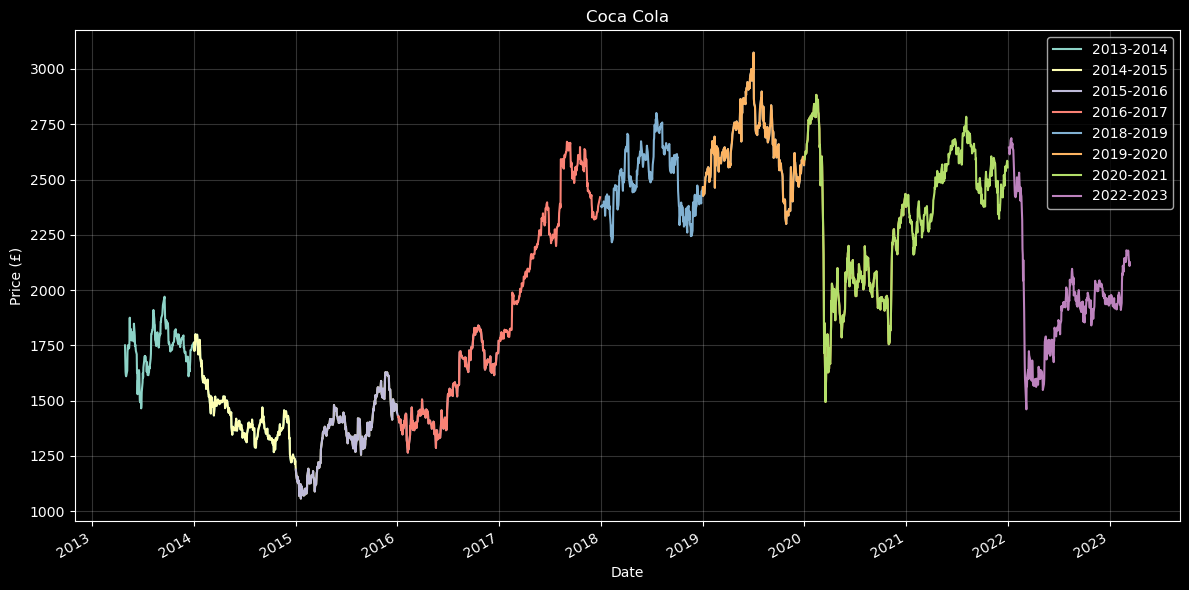

In [221]:
plt.style.use('dark_background')

plt.figure(figsize=(12, 6))
coca_cola.loc['2013-04-29':'2014-12-31', 'Close'].plot(label='2013-2014')
coca_cola.loc['2014-01-01':'2015-12-31', 'Close'].plot(label='2014-2015')
coca_cola.loc['2015-01-01':'2016-12-31', 'Close'].plot(label='2015-2016')
coca_cola.loc['2016-01-01':'2017-12-31', 'Close'].plot(label='2016-2017')
coca_cola.loc['2018-01-01':'2019-12-31', 'Close'].plot(label='2018-2019')
coca_cola.loc['2019-01-01':'2020-12-31', 'Close'].plot(label='2019-2020')
coca_cola.loc['2020-01-01':'2021-12-31', 'Close'].plot(label='2020-2021')
coca_cola.loc['2022-01-01':'2023-03-14', 'Close'].plot(label='2022-2023')
plt.xlabel('Date')
plt.ylabel('Price (£)')
plt.title('Coca Cola')
plt.legend()
plt.grid(color='white', alpha=0.20)
plt.tight_layout()
plt.show()

### 8. Generate New Variable in DataFrame

1. Price Difference: Price difference is the difference in price between two consecutive time periods. For example, if the stock price was £100 yesterday and £105 today, the price difference would be £5.

2. Daily Return: Daily return is a measure of the percentage change in price from one day to the next. It is calculated as the price difference divided by the previous day's price. In the example above, the daily return would be (105-100)/100 = 0.05 or 5%.

3. Direction: Direction refers to the direction in which the stock price is moving, either upward or downward. If the price difference is positive, the direction is upward, and if the price difference is negative, the direction is downward.

4. Moving Average: Moving average is a technical indicator that is used to identify trends in stock prices. It is calculated by taking the average of a set number of consecutive closing prices. For example, a 40-day moving average would be the average of the last 40 closing prices. Moving averages are often used to smooth out short-term fluctuations in the stock price and provide a clearer picture of the long-term trend. A rising moving average indicates that the stock price is trending upward, while a falling moving average indicates that the stock price is trending downward.

#### 1. Price shifting

In [222]:
coca_cola['Price_shift_1'] = coca_cola['Close'].shift(-1)

#### 2. Price Difference

In [223]:
coca_cola['PriceDiff'] = coca_cola["Price_shift_1"] - coca_cola['Close']

In [224]:
coca_cola.tail(10)

,Open,High,Low,Close,Adj Close,Volume,Price_shift_1,PriceDiff
Date,,,,,,,,
2023-03-01,2134.0,2171.0,2134.0,2140.0,2140.0,696780,2180.0,40.0
2023-03-02,2134.0,2185.0,2116.0,2180.0,2180.0,485728,2177.0,-3.0
2023-03-03,2189.0,2189.0,2168.0,2177.0,2177.0,462238,2175.0,-2.0
2023-03-06,2182.0,2182.0,2150.0,2175.0,2175.0,637028,2160.0,-15.0
2023-03-07,2173.0,2173.0,2123.0,2160.0,2160.0,856139,2179.0,19.0
2023-03-08,2149.0,2188.0,2149.0,2179.0,2179.0,673939,2175.0,-4.0
2023-03-09,2162.0,2194.0,2162.0,2175.0,2175.0,532855,2146.0,-29.0
2023-03-10,2168.0,2176.0,2129.0,2146.0,2146.0,540296,2109.0,-37.0
2023-03-13,2145.0,2145.0,2092.0,2109.0,2109.0,607453,2126.0,17.0


#### 3. Daily Return

In [225]:
coca_cola['Return'] = coca_cola['PriceDiff']/coca_cola['Close']

In [226]:
coca_cola.tail(10)

,Open,High,Low,Close,Adj Close,Volume,Price_shift_1,PriceDiff,Return
Date,,,,,,,,,
2023-03-01,2134.0,2171.0,2134.0,2140.0,2140.0,696780,2180.0,40.0,0.018692
2023-03-02,2134.0,2185.0,2116.0,2180.0,2180.0,485728,2177.0,-3.0,-0.001376
2023-03-03,2189.0,2189.0,2168.0,2177.0,2177.0,462238,2175.0,-2.0,-0.000919
2023-03-06,2182.0,2182.0,2150.0,2175.0,2175.0,637028,2160.0,-15.0,-0.006897
2023-03-07,2173.0,2173.0,2123.0,2160.0,2160.0,856139,2179.0,19.0,0.008796
2023-03-08,2149.0,2188.0,2149.0,2179.0,2179.0,673939,2175.0,-4.0,-0.001836
2023-03-09,2162.0,2194.0,2162.0,2175.0,2175.0,532855,2146.0,-29.0,-0.013333
2023-03-10,2168.0,2176.0,2129.0,2146.0,2146.0,540296,2109.0,-37.0,-0.017241
2023-03-13,2145.0,2145.0,2092.0,2109.0,2109.0,607453,2126.0,17.0,0.008061


#### 4. Direction 

In [227]:
# coca_cola['Direction'] = [1 if coca_cola.loc[ei, 'PriceDiff'] > 0 else -1 for ei in coca_cola.index]
coca_cola['Direction'] = np.where(coca_cola['PriceDiff'] > 0, 1, -1)

In [228]:
coca_cola

,Open,High,Low,Close,Adj Close,Volume,Price_shift_1,PriceDiff,Return,Direction
Date,,,,,,,,,,
2013-04-29,1750.0,1750.0,1685.0,1750.0,1288.258545,479602,1690.0,-60.0,-0.034286,-1
2013-04-30,1775.0,1829.0,1550.0,1690.0,1244.089600,1755272,1630.0,-60.0,-0.035503,-1
2013-05-01,1724.0,1724.0,1602.0,1630.0,1199.920898,377226,1615.0,-15.0,-0.009202,-1
2013-05-02,1557.0,1632.0,1557.0,1615.0,1188.878540,1296597,1610.0,-5.0,-0.003096,-1
2013-05-03,1630.0,1630.0,1600.0,1610.0,1185.197754,341846,1635.0,25.0,0.015528,1
...,...,...,...,...,...,...,...,...,...,...
2023-03-08,2149.0,2188.0,2149.0,2179.0,2179.000000,673939,2175.0,-4.0,-0.001836,-1
2023-03-09,2162.0,2194.0,2162.0,2175.0,2175.000000,532855,2146.0,-29.0,-0.013333,-1
2023-03-10,2168.0,2176.0,2129.0,2146.0,2146.000000,540296,2109.0,-37.0,-0.017241,-1


#### 5. Moving Average

Random fluctuations are very common in stock price

In [229]:
coca_cola['Moving_average_3days'] = (coca_cola['Close'] + coca_cola['Close'].shift(1) + coca_cola['Close'].shift(2))/3

In [230]:
coca_cola

,Open,High,Low,Close,Adj Close,Volume,Price_shift_1,PriceDiff,Return,Direction,Moving_average_3days
Date,,,,,,,,,,,
2013-04-29,1750.0,1750.0,1685.0,1750.0,1288.258545,479602,1690.0,-60.0,-0.034286,-1,NaN
2013-04-30,1775.0,1829.0,1550.0,1690.0,1244.089600,1755272,1630.0,-60.0,-0.035503,-1,NaN
2013-05-01,1724.0,1724.0,1602.0,1630.0,1199.920898,377226,1615.0,-15.0,-0.009202,-1,1690.000000
2013-05-02,1557.0,1632.0,1557.0,1615.0,1188.878540,1296597,1610.0,-5.0,-0.003096,-1,1645.000000
2013-05-03,1630.0,1630.0,1600.0,1610.0,1185.197754,341846,1635.0,25.0,0.015528,1,1618.333333
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-08,2149.0,2188.0,2149.0,2179.0,2179.000000,673939,2175.0,-4.0,-0.001836,-1,2171.333333
2023-03-09,2162.0,2194.0,2162.0,2175.0,2175.000000,532855,2146.0,-29.0,-0.013333,-1,2171.333333
2023-03-10,2168.0,2176.0,2129.0,2146.0,2146.000000,540296,2109.0,-37.0,-0.017241,-1,2166.666667


#### 6. Compute Moving Average over any Numbers of days

Rolling windows calculations

In [231]:
#Moving average price 40 days
coca_cola['MA40'] = coca_cola['Close'].rolling(40).mean()

In [232]:
coca_cola['MA200'] = coca_cola['Close'].rolling(200).mean()

In [233]:
coca_cola

,Open,High,Low,Close,Adj Close,Volume,Price_shift_1,PriceDiff,Return,Direction,Moving_average_3days,MA40,MA200
Date,,,,,,,,,,,,,
2013-04-29,1750.0,1750.0,1685.0,1750.0,1288.258545,479602,1690.0,-60.0,-0.034286,-1,NaN,NaN,NaN
2013-04-30,1775.0,1829.0,1550.0,1690.0,1244.089600,1755272,1630.0,-60.0,-0.035503,-1,NaN,NaN,NaN
2013-05-01,1724.0,1724.0,1602.0,1630.0,1199.920898,377226,1615.0,-15.0,-0.009202,-1,1690.000000,NaN,NaN
2013-05-02,1557.0,1632.0,1557.0,1615.0,1188.878540,1296597,1610.0,-5.0,-0.003096,-1,1645.000000,NaN,NaN
2013-05-03,1630.0,1630.0,1600.0,1610.0,1185.197754,341846,1635.0,25.0,0.015528,1,1618.333333,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-08,2149.0,2188.0,2149.0,2179.0,2179.000000,673939,2175.0,-4.0,-0.001836,-1,2171.333333,2019.5375,1944.6300
2023-03-09,2162.0,2194.0,2162.0,2175.0,2175.000000,532855,2146.0,-29.0,-0.013333,-1,2171.333333,2025.7500,1946.9450
2023-03-10,2168.0,2176.0,2129.0,2146.0,2146.000000,540296,2109.0,-37.0,-0.017241,-1,2166.666667,2031.1875,1948.9075


#### Plot Moving Averages

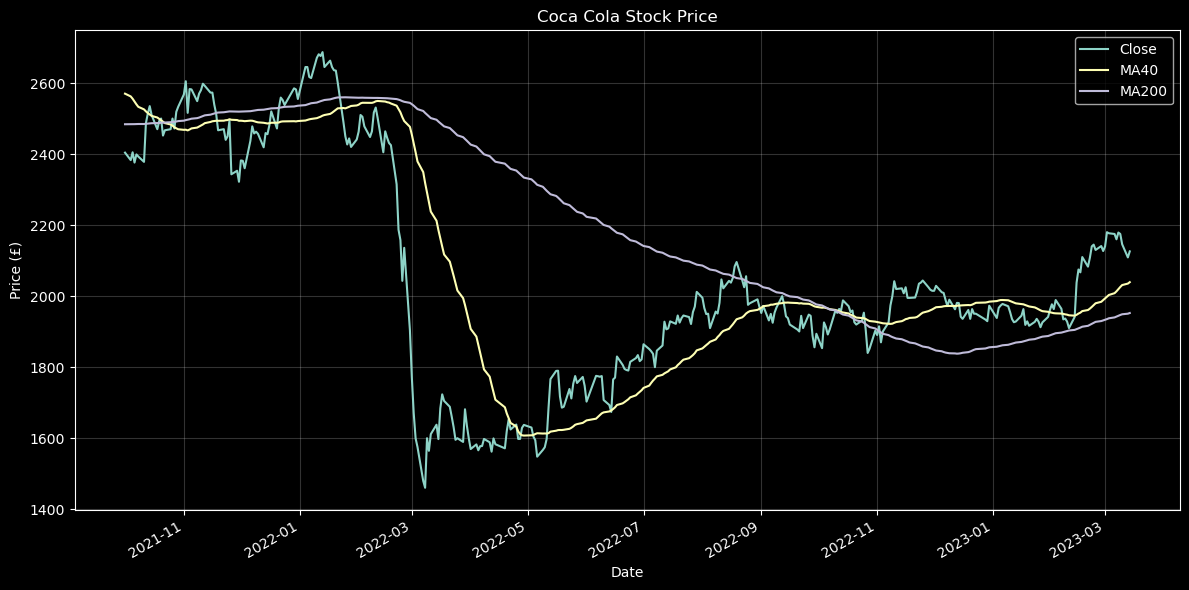

In [234]:
plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(12, 6))
coca_cola['Close'].tail(365).plot(label='Close', ax=ax)
coca_cola['MA40'].tail(365).plot(label='MA40', ax=ax)
coca_cola['MA200'].tail(365).plot(label='MA200', ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Price (£)')
ax.set_title('Coca Cola Stock Price')
ax.legend()
ax.grid(color='white', alpha=0.20)
plt.tight_layout()
plt.show()

The moving average is a technical indicator that is often used to identify trends in stock prices. A moving average is calculated by taking the average of a set number of consecutive closing prices. The 40-day moving average (MA40) and 200-day moving average (MA200) are commonly used time periods for moving averages.

When the MA40 is greater than the MA200, it is often interpreted as a bullish signal, indicating that the short-term trend of the stock price is upward. This is because the MA40 is more sensitive to recent price movements and therefore changes more quickly than the MA200. When the MA40 rises above the MA200, it suggests that the stock price has recently been rising faster than its longer-term trend, and that this upward momentum may continue for a while.

## 9. Trading Strategy

### Fast Signal & Slow Signal

The Fast Signal & Slow Signal strategy is a trading strategy that uses two moving averages to identify trends in the stock market. The fast signal is a short-term moving average, such as a 20-day or 40-day moving average, while the slow signal is a longer-term moving average, such as a 200-day moving average.

The basic idea behind the strategy is that when the fast signal is above the slow signal, it is a bullish signal, indicating that the stock price is trending upward. In this case, the trader might buy the stock. When the fast signal is below the slow signal, it is a bearish signal, indicating that the stock price is trending downward. In this case, the trader might sell the stock.

The Fast Signal & Slow Signal strategy is based on the idea that the long-term trend of the stock market is a good indicator of future price movements. By using the fast signal to identify short-term fluctuations in the stock price and the slow signal to identify the long-term trend, traders can make more informed decisions about when to buy and sell.

In [235]:
#Fast signal
coca_cola['MA10'] = coca_cola['Close'].rolling(10).mean()

In [236]:
#Slow signal
coca_cola['MA50'] = coca_cola['Close'].rolling(50).mean()

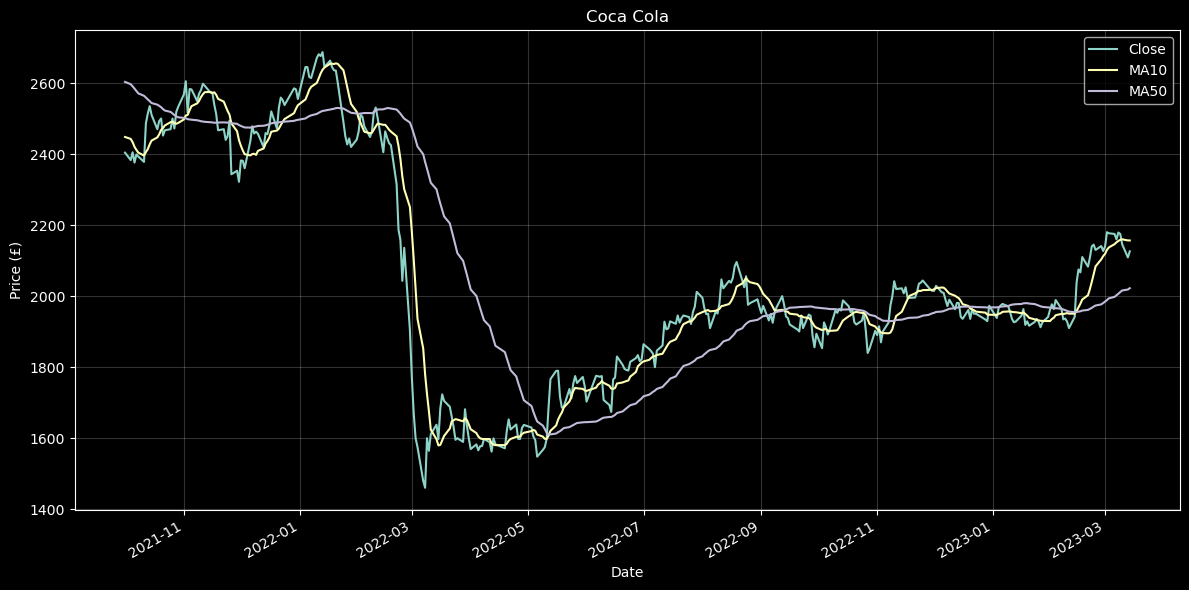

In [237]:
plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(12, 6))
coca_cola['Close'].tail(365).plot(label='Close', ax=ax)
coca_cola['MA10'].tail(365).plot(label='MA10', ax=ax)
coca_cola['MA50'].tail(365).plot(label='MA50', ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Price (£)')
ax.set_title('Coca Cola')
ax.legend()
ax.grid(color='white', alpha=0.20)
plt.tight_layout()
plt.show()

#### <font color = "red"> Long or Not

The decision to go long or not in a particular stock or market is a complex one that depends on many factors, including market conditions, economic indicators, and individual stock performance. It's not possible to make a blanket statement about whether or not it's a good idea to go long in the stock market.

A trading strategy such as the Fast Signal & Slow Signal strategy described above can provide some guidance on the direction of the market and help traders make informed decisions about when to buy and sell. However, it's important to consider multiple indicators and to understand the underlying economic and market conditions that are driving stock price

In [238]:
coca_cola['Shares'] = [1 if coca_cola.loc[ei, 'MA10']>coca_cola.loc[ei, 'MA50'] else 0 for ei in coca_cola.index]

In [239]:
coca_cola.tail(365)

,Open,High,Low,Close,Adj Close,Volume,Price_shift_1,PriceDiff,Return,Direction,Moving_average_3days,MA40,MA200,MA10,MA50,Shares
Date,,,,,,,,,,,,,,,,
2021-10-01,2374.0,2431.000000,2358.0,2404.0,2311.110840,1240852,2383.0,-21.0,-0.008735,-1,2411.666667,2570.0250,2483.9300,2448.1,2603.12,0
2021-10-04,2394.0,2416.000000,2379.0,2383.0,2290.922363,388375,2405.0,22.0,0.009232,1,2395.333333,2562.2750,2484.0150,2442.6,2596.58,0
2021-10-05,2391.0,2405.000000,2379.0,2405.0,2312.072266,625748,2376.0,-29.0,-0.012058,-1,2397.333333,2555.8000,2484.2450,2433.5,2590.72,0
2021-10-06,2382.0,2382.000000,2334.0,2376.0,2284.192627,414578,2399.0,23.0,0.009680,1,2388.000000,2547.8750,2484.1950,2420.4,2584.06,0
2021-10-07,2400.0,2406.894043,2384.0,2399.0,2306.303955,351730,2393.0,-6.0,-0.002501,-1,2393.333333,2539.9000,2484.5000,2411.6,2577.78,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-08,2149.0,2188.000000,2149.0,2179.0,2179.000000,673939,2175.0,-4.0,-0.001836,-1,2171.333333,2019.5375,1944.6300,2155.4,2006.74,1
2023-03-09,2162.0,2194.000000,2162.0,2175.0,2175.000000,532855,2146.0,-29.0,-0.013333,-1,2171.333333,2025.7500,1946.9450,2158.4,2011.56,1
2023-03-10,2168.0,2176.000000,2129.0,2146.0,2146.000000,540296,2109.0,-37.0,-0.017241,-1,2166.666667,2031.1875,1948.9075,2160.0,2015.89,1


#### <font color="red">Daily profit

In [240]:
coca_cola['Close_day1'] = coca_cola['Close'].shift(-1)

In [241]:
coca_cola.shape

(2497, 17)

In [242]:
coca_cola.iloc[2132:2497,:]

,Open,High,Low,Close,Adj Close,Volume,Price_shift_1,PriceDiff,Return,Direction,Moving_average_3days,MA40,MA200,MA10,MA50,Shares,Close_day1
Date,,,,,,,,,,,,,,,,,
2021-10-01,2374.0,2431.000000,2358.0,2404.0,2311.110840,1240852,2383.0,-21.0,-0.008735,-1,2411.666667,2570.0250,2483.9300,2448.1,2603.12,0,2383.0
2021-10-04,2394.0,2416.000000,2379.0,2383.0,2290.922363,388375,2405.0,22.0,0.009232,1,2395.333333,2562.2750,2484.0150,2442.6,2596.58,0,2405.0
2021-10-05,2391.0,2405.000000,2379.0,2405.0,2312.072266,625748,2376.0,-29.0,-0.012058,-1,2397.333333,2555.8000,2484.2450,2433.5,2590.72,0,2376.0
2021-10-06,2382.0,2382.000000,2334.0,2376.0,2284.192627,414578,2399.0,23.0,0.009680,1,2388.000000,2547.8750,2484.1950,2420.4,2584.06,0,2399.0
2021-10-07,2400.0,2406.894043,2384.0,2399.0,2306.303955,351730,2393.0,-6.0,-0.002501,-1,2393.333333,2539.9000,2484.5000,2411.6,2577.78,0,2393.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-08,2149.0,2188.000000,2149.0,2179.0,2179.000000,673939,2175.0,-4.0,-0.001836,-1,2171.333333,2019.5375,1944.6300,2155.4,2006.74,1,2175.0
2023-03-09,2162.0,2194.000000,2162.0,2175.0,2175.000000,532855,2146.0,-29.0,-0.013333,-1,2171.333333,2025.7500,1946.9450,2158.4,2011.56,1,2146.0
2023-03-10,2168.0,2176.000000,2129.0,2146.0,2146.000000,540296,2109.0,-37.0,-0.017241,-1,2166.666667,2031.1875,1948.9075,2160.0,2015.89,1,2109.0


In [251]:
coca_cola['Profit'] = [coca_cola.loc[ei, 'Close_day1']-coca_cola.loc[ei, 'Close'] if coca_cola.loc[ei, 'Shares']==1 else 0 for ei in coca_cola.index]

In [252]:
coca_cola

,Open,High,Low,Close,Adj Close,Volume,Price_shift_1,PriceDiff,Return,Direction,Moving_average_3days,MA40,MA200,MA10,MA50,Shares,Close_day1,Profit
Date,,,,,,,,,,,,,,,,,,
2013-04-29,1750.0,1750.0,1685.0,1750.0,1288.258545,479602,1690.0,-60.0,-0.034286,-1,NaN,NaN,NaN,NaN,NaN,0,1690.0,0.0
2013-04-30,1775.0,1829.0,1550.0,1690.0,1244.089600,1755272,1630.0,-60.0,-0.035503,-1,NaN,NaN,NaN,NaN,NaN,0,1630.0,0.0
2013-05-01,1724.0,1724.0,1602.0,1630.0,1199.920898,377226,1615.0,-15.0,-0.009202,-1,1690.000000,NaN,NaN,NaN,NaN,0,1615.0,0.0
2013-05-02,1557.0,1632.0,1557.0,1615.0,1188.878540,1296597,1610.0,-5.0,-0.003096,-1,1645.000000,NaN,NaN,NaN,NaN,0,1610.0,0.0
2013-05-03,1630.0,1630.0,1600.0,1610.0,1185.197754,341846,1635.0,25.0,0.015528,1,1618.333333,NaN,NaN,NaN,NaN,0,1635.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-08,2149.0,2188.0,2149.0,2179.0,2179.000000,673939,2175.0,-4.0,-0.001836,-1,2171.333333,2019.5375,1944.6300,2155.4,2006.74,1,2175.0,-4.0
2023-03-09,2162.0,2194.0,2162.0,2175.0,2175.000000,532855,2146.0,-29.0,-0.013333,-1,2171.333333,2025.7500,1946.9450,2158.4,2011.56,1,2146.0,-29.0
2023-03-10,2168.0,2176.0,2129.0,2146.0,2146.000000,540296,2109.0,-37.0,-0.017241,-1,2166.666667,2031.1875,1948.9075,2160.0,2015.89,1,2109.0,-37.0


Daily profit is equal to the close price of tomorrow minus close price of today. it value can be negative & positive. if negative, we lose money on that day. if shares equal to zero which mean we don't have stock at hand.

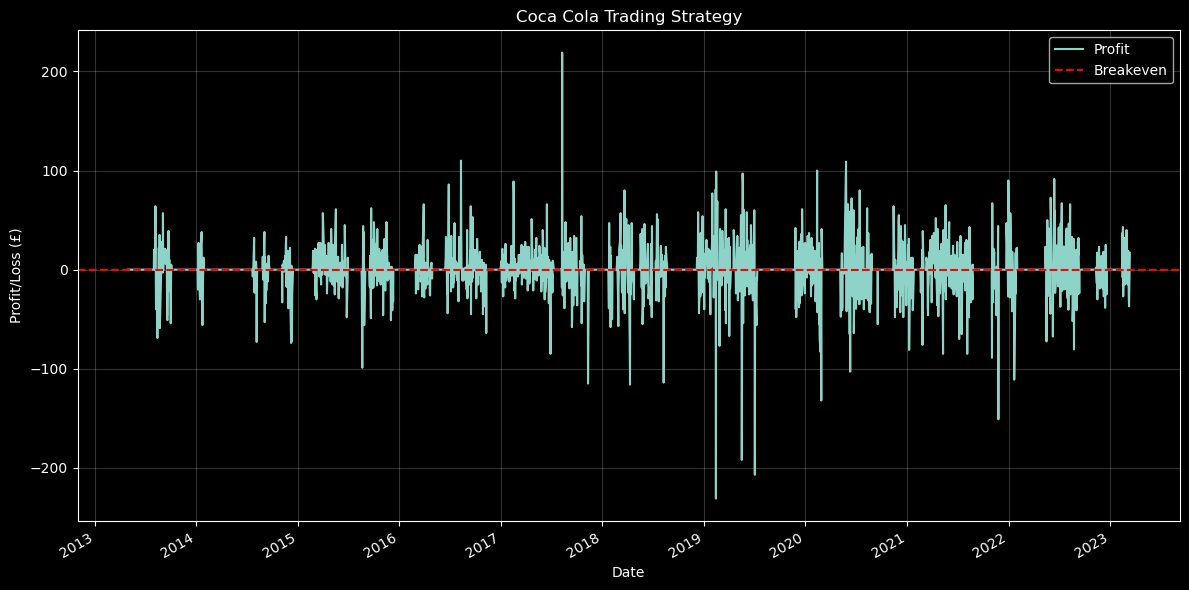

In [277]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
coca_cola['Profit'].plot(label='Profit', ax=ax)
ax.axhline(y=0, color='red', label='Breakeven', linestyle='--')
ax.set_xlabel('Date')
ax.set_ylabel('Profit/Loss (£)')
ax.set_title('Coca Cola Trading Strategy')
ax.legend()
ax.grid(color='white', alpha=0.20)
plt.tight_layout()
plt.show()

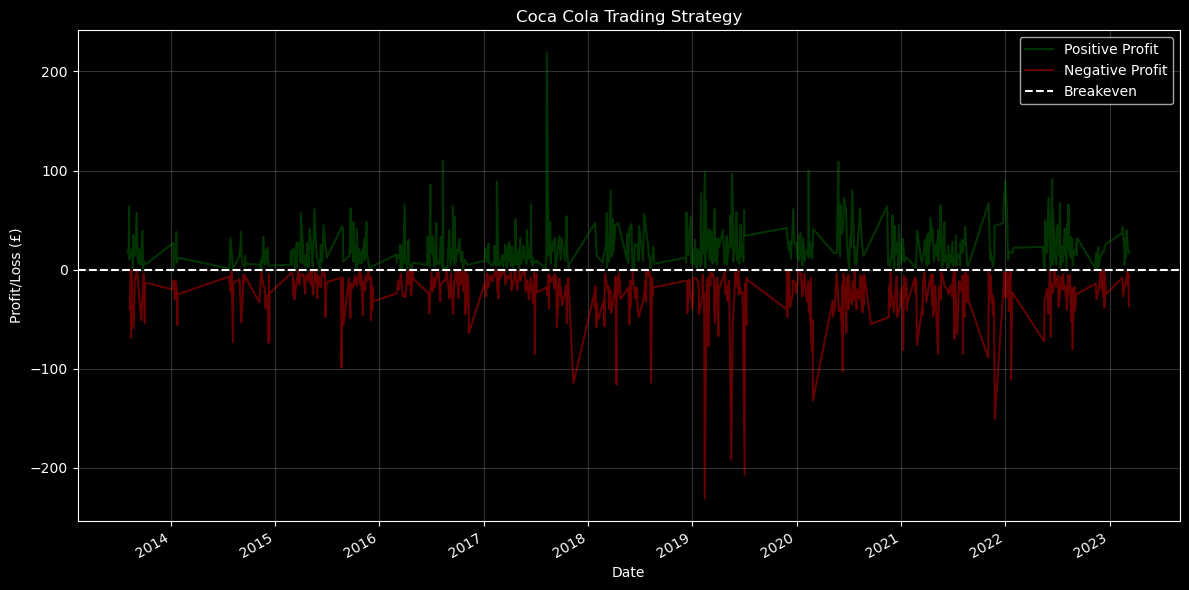

In [275]:
plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(12, 6))

pos_profit = coca_cola.loc[coca_cola['Profit'] > 0, 'Profit']
neg_profit = coca_cola.loc[coca_cola['Profit'] < 0, 'Profit']

pos_profit.plot(label='Positive Profit', color='green',alpha=0.40, ax=ax)
neg_profit.plot(label='Negative Profit', color='red',alpha=0.40, ax=ax)

ax.axhline(y=0, color='white', label='Breakeven', linestyle='--')
ax.set_xlabel('Date')
ax.set_ylabel('Profit/Loss (£)')
ax.set_title('Coca Cola Trading Strategy')
ax.legend()
ax.grid(color='white', alpha=0.20)
plt.tight_layout()
plt.show()


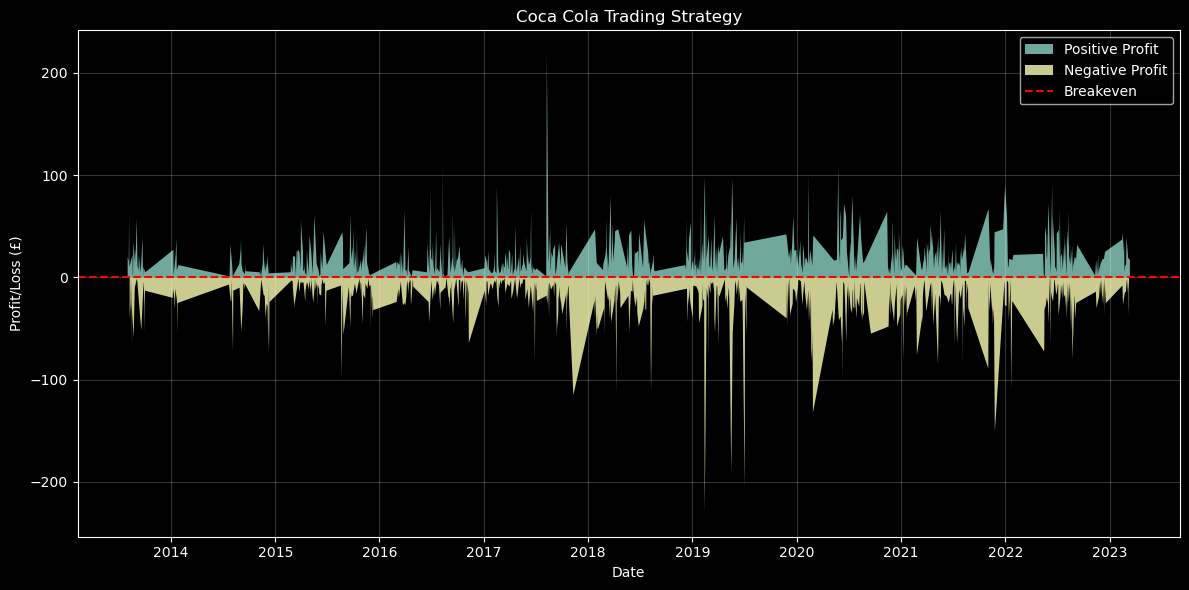

In [272]:
plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(12, 6))

pos_profit = coca_cola.loc[coca_cola['Profit'] > 0, 'Profit']
neg_profit = coca_cola.loc[coca_cola['Profit'] < 0, 'Profit']

ax.fill_between(pos_profit.index, pos_profit, 0.05, alpha=0.8, label='Positive Profit')
ax.fill_between(neg_profit.index, neg_profit, -0.05, alpha=0.8, label='Negative Profit')

ax.axhline(y=0, color='red', label='Breakeven', linestyle='--')
ax.set_xlabel('Date')
ax.set_ylabel('Profit/Loss (£)')
ax.set_title('Coca Cola Trading Strategy')
ax.legend()
ax.grid(color='white', alpha=0.20)
plt.tight_layout()
plt.show()

### Cumulative Wealth

In [278]:
coca_cola['Wealth'] = coca_cola['Profit'].cumsum()

In [279]:
coca_cola.tail()

,Open,High,Low,Close,Adj Close,Volume,Price_shift_1,PriceDiff,Return,Direction,Moving_average_3days,MA40,MA200,MA10,MA50,Shares,Close_day1,Profit,Wealth
Date,,,,,,,,,,,,,,,,,,,
2023-03-08,2149.0,2188.0,2149.0,2179.0,2179.0,673939,2175.0,-4.0,-0.001836,-1,2171.333333,2019.5375,1944.6300,2155.4,2006.74,1,2175.0,-4.0,98.5
2023-03-09,2162.0,2194.0,2162.0,2175.0,2175.0,532855,2146.0,-29.0,-0.013333,-1,2171.333333,2025.7500,1946.9450,2158.4,2011.56,1,2146.0,-29.0,69.5
2023-03-10,2168.0,2176.0,2129.0,2146.0,2146.0,540296,2109.0,-37.0,-0.017241,-1,2166.666667,2031.1875,1948.9075,2160.0,2015.89,1,2109.0,-37.0,32.5
2023-03-13,2145.0,2145.0,2092.0,2109.0,2109.0,607453,2126.0,17.0,0.008061,1,2143.333333,2035.2875,1950.5775,2156.8,2018.61,1,2126.0,17.0,49.5
2023-03-14,2105.0,2126.0,2102.0,2126.0,2126.0,152946,NaN,NaN,NaN,-1,2127.000000,2039.3500,1952.4300,2156.7,2022.36,1,NaN,NaN,NaN


In [281]:
print("Total Money you win is", coca_cola.loc[coca_cola.index[-2], 'Wealth'])
print("Total Money you spent is", coca_cola.loc[coca_cola.index[0], 'Close'])

Total Money you win is 49.5
Total Money you spent is 1750.0


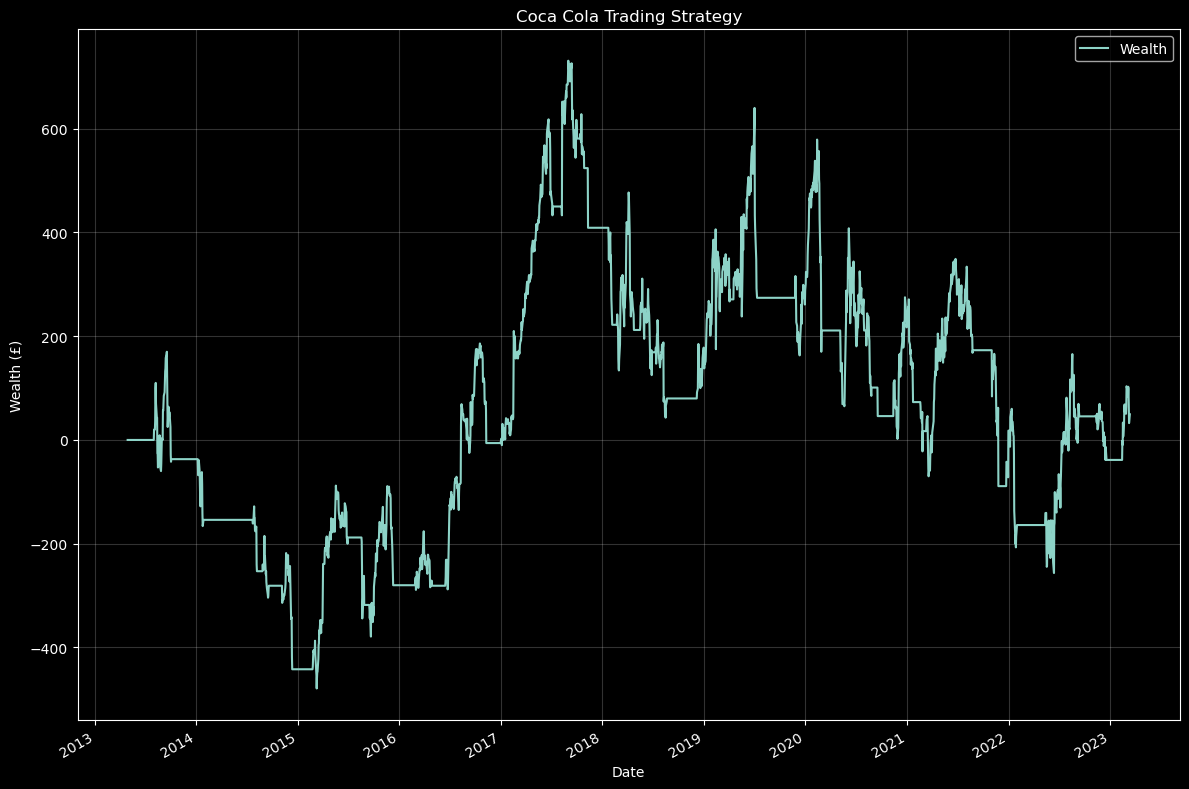

In [283]:
plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(12, 8))

coca_cola['Wealth'].plot(label='Wealth', ax=ax)

ax.set_xlabel('Date')
ax.set_ylabel('Wealth (£)')
ax.set_title('Coca Cola Trading Strategy')
ax.legend()
ax.grid(color='white', alpha=0.20)
plt.tight_layout()
plt.show()